<a href="https://colab.research.google.com/github/getreadytoUG/KDT_WORK/blob/main/%EA%B3%BC%EC%A0%9C2_earthquake_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3. 과제 2
* 2023 지진 데이터

영어 | 한글
:---: | :---:
time | 시간
latitude | 위도
longitude | 경도
depth | 진원 깊이
mag | 규모
magType | 측정 유형
nst | 지진을 보고한 지진 관측소의 수
gap | 서로 다른 지진 관측소의 적용 범위 사이의 간격
dmin | 가장 가까운 관측소의 지진 진원지까지의 최소 거리
rms | 지진 진폭 스페트럼의 평균 제곱근
net | 지진을 보고하는 네트워크
id | 지진 이벤트의 고유 식별자
updated | 지진 정보가 마지막으로 업데이트된 시기
place | 지진 발생 위치 설명
type | 지진 사건의 유형
horizontalError | 위치 결정 시 수평 오류 발생
depthError | 깊이 결정 오류
magError | 크기 결정 오류
magNst | 규모를 계산하는데 사용되는 지진 관측소의 수
status | 상태
locationSource | 지진 위치를 보고하는 소스
magSource | 지진 규모를 보고하는 소스


* 목적 : Depth 를 예측

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
eq_df = pd.read_csv("/content/drive/MyDrive/KDT/8. 머신러닝 딥러닝/data/earthquakes_2023_global.csv")
eq_df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-01-01T00:49:25.294Z,52.0999,178.5218,82.770,3.10,ml,14.0,139.0,0.8700,0.18,us,us7000j5a1,2023-03-11T22:51:52.040Z,"Rat Islands, Aleutian Islands, Alaska",earthquake,8.46,21.213,0.097,14.0,reviewed,us,us
1,2023-01-01T01:41:43.755Z,7.1397,126.7380,79.194,4.50,mb,32.0,104.0,1.1520,0.47,us,us7000j3xk,2023-03-11T22:51:45.040Z,"23 km ESE of Manay, Philippines",earthquake,5.51,7.445,0.083,43.0,reviewed,us,us
2,2023-01-01T03:29:31.070Z,19.1631,-66.5251,24.000,3.93,md,23.0,246.0,0.8479,0.22,pr,pr2023001000,2023-03-11T22:51:29.040Z,Puerto Rico region,earthquake,0.91,15.950,0.090,16.0,reviewed,pr,pr
3,2023-01-01T04:09:32.814Z,-4.7803,102.7675,63.787,4.30,mb,17.0,187.0,0.4570,0.51,us,us7000j3xm,2023-03-11T22:51:45.040Z,"99 km SSW of Pagar Alam, Indonesia",earthquake,10.25,6.579,0.238,5.0,reviewed,us,us
4,2023-01-01T04:29:13.793Z,53.3965,-166.9417,10.000,3.00,ml,19.0,190.0,0.4000,0.31,us,us7000j1zd,2023-03-11T22:51:38.040Z,"59 km SSW of Unalaska, Alaska",earthquake,1.41,1.999,0.085,18.0,reviewed,us,us


In [ ]:
eq_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26642 entries, 0 to 26641
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             26642 non-null  object 
 1   latitude         26642 non-null  float64
 2   longitude        26642 non-null  float64
 3   depth            26642 non-null  float64
 4   mag              26642 non-null  float64
 5   magType          26642 non-null  object 
 6   nst              25227 non-null  float64
 7   gap              25225 non-null  float64
 8   dmin             24776 non-null  float64
 9   rms              26642 non-null  float64
 10  net              26642 non-null  object 
 11  id               26642 non-null  object 
 12  updated          26642 non-null  object 
 13  place            25034 non-null  object 
 14  type             26642 non-null  object 
 15  horizontalError  25093 non-null  float64
 16  depthError       26642 non-null  float64
 17  magError    

In [ ]:
eq_df["type"].value_counts()

earthquake           26428
mining explosion       167
ice quake               26
volcanic eruption       13
explosion                3
quarry blast             2
Landslide                2
landslide                1
Name: type, dtype: int64

In [ ]:
drop_columns = ["time","magType", "rms", "net", "id", "updated", "place", "type", "status", "locationSource", "magSource", "horizontalError", "depthError", "magError"]

In [ ]:
eq_df.drop(drop_columns, axis=1, inplace=True)

In [ ]:
eq_df

,latitude,longitude,depth,mag,nst,gap,dmin,magNst
0,52.0999,178.5218,82.770,3.10,14.0,139.0,0.8700,14.0
1,7.1397,126.7380,79.194,4.50,32.0,104.0,1.1520,43.0
2,19.1631,-66.5251,24.000,3.93,23.0,246.0,0.8479,16.0
3,-4.7803,102.7675,63.787,4.30,17.0,187.0,0.4570,5.0
4,53.3965,-166.9417,10.000,3.00,19.0,190.0,0.4000,18.0
...,...,...,...,...,...,...,...,...
26637,-6.9527,154.9829,10.000,5.20,72.0,60.0,3.9240,141.0
26638,32.3262,141.7386,10.000,5.10,74.0,121.0,1.8030,187.0
26639,-7.2411,68.0663,10.000,5.10,60.0,54.0,12.7760,40.0
26640,-19.1602,169.0428,153.264,4.70,40.0,61.0,3.7460,46.0


In [ ]:
eq_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26642 entries, 0 to 26641
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   latitude   26642 non-null  float64
 1   longitude  26642 non-null  float64
 2   depth      26642 non-null  float64
 3   mag        26642 non-null  float64
 4   nst        25227 non-null  float64
 5   gap        25225 non-null  float64
 6   dmin       24776 non-null  float64
 7   magNst     25065 non-null  float64
dtypes: float64(8)
memory usage: 1.6 MB


영어 | 한글
:---: | :---:
nst | 지진을 보고한 지진 관측소의 수
gap | 서로 다른 지진 관측소의 적용 범위 사이의 간격
dmin | 가장 가까운 관측소의 지진 진원지까지의 최소 거리
magNst | 규모를 계산하는데 사용되는 지진 관측소의 수


In [ ]:
eq_df.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,magNst
count,26642.000000,26642.000000,26642.000000,26642.000000,25227.000000,25225.000000,24776.000000,25065.000000
mean,16.852798,-11.487497,67.491224,4.007395,42.571332,124.930971,2.692908,33.315939
std,30.389200,130.053399,116.762456,0.794423,37.662352,67.430145,4.043568,48.022567
min,-65.849700,-179.998700,-3.370000,2.600000,0.000000,8.000000,0.000000,0.000000
25%,-6.415275,-149.608650,10.000000,3.220000,19.000000,73.000000,0.612000,10.000000
50%,18.884167,-64.811833,21.998000,4.300000,30.000000,111.000000,1.579000,18.000000
75%,41.827950,126.965100,66.833000,4.500000,52.000000,165.000000,3.172000,36.000000
max,86.593900,179.999400,681.238000,7.800000,423.000000,350.000000,50.820000,884.000000


In [ ]:
eq_df = eq_df.dropna(subset=["nst", "gap", "dmin", "magNst"], axis=0)

In [ ]:
eq_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24614 entries, 0 to 26641
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   latitude   24614 non-null  float64
 1   longitude  24614 non-null  float64
 2   depth      24614 non-null  float64
 3   mag        24614 non-null  float64
 4   nst        24614 non-null  float64
 5   gap        24614 non-null  float64
 6   dmin       24614 non-null  float64
 7   magNst     24614 non-null  float64
dtypes: float64(8)
memory usage: 1.7 MB


In [ ]:
from plotly.express import scatter_geo
scatter_geo(data_frame=eq_df, lat='latitude', lon='longitude',  color='mag').show()

<Axes: >

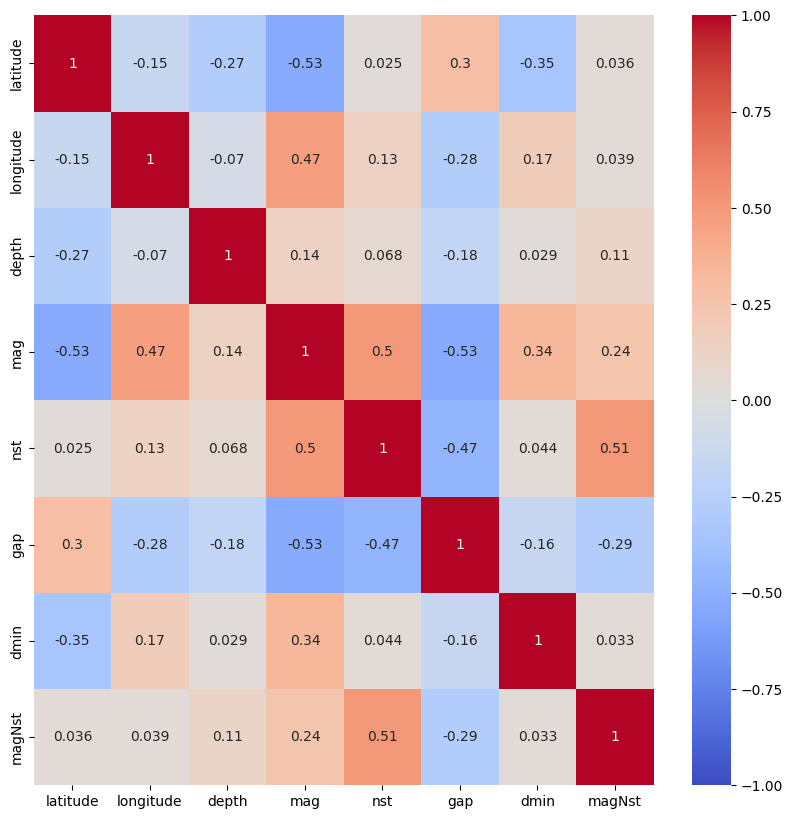

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(eq_df.corr(), cmap="coolwarm", vmin=-1, vmax=1, annot=True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


min_max_scaler = MinMaxScaler()

scaled = min_max_scaler.fit_transform(eq_df.drop("depth", axis=1))

scaled

array([[0.77372615, 0.99589553, 0.09615385, ..., 0.38304094, 0.01711924,
        0.0158371 ],
       [0.47879609, 0.85205089, 0.36538462, ..., 0.28070175, 0.02266824,
        0.04864253],
       [0.55766723, 0.31520611, 0.25576923, ..., 0.69590643, 0.01668438,
        0.01809955],
       ...,
       [0.38446088, 0.68907308, 0.48076923, ..., 0.13450292, 0.25139709,
        0.04524887],
       [0.30627393, 0.96956484, 0.40384615, ..., 0.15497076, 0.07371114,
        0.0520362 ],
       [0.59664492, 0.76814183, 0.46153846, ..., 0.16374269, 0.08177883,
        0.07239819]])

In [ ]:
depth = eq_df["depth"]

X_train, X_test, y_train, y_test = train_test_split(scaled, depth, test_size=0.2, random_state=777)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(19691, 7) (19691,)
(4923, 7) (4923,)


<Axes: xlabel='mag', ylabel='depth'>

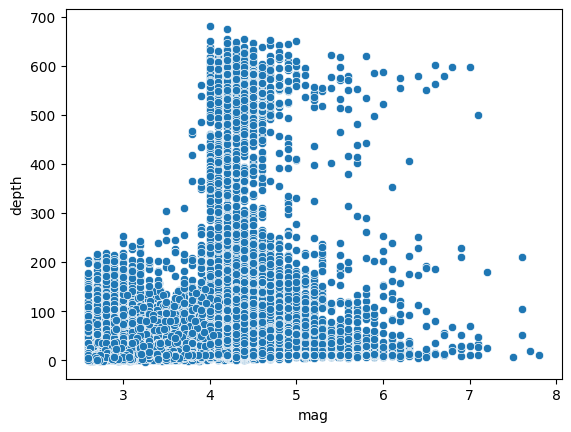

In [ ]:
sns.scatterplot(x=eq_df["mag"], y=eq_df["depth"])

### 0. 함수

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

my_predictions = {}
colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive',
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray',
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato']

def plot_predictions(name_, pred, actual):
  df = pd.DataFrame({'prediction': pred, 'actual': y_test})
  df = df.sort_values(by='actual').reset_index(drop=True)

  plt.figure(figsize=(8, 6))
  plt.scatter(df.index, df['prediction'], marker='x', color='r')
  plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
  plt.title(name_, fontsize=15)
  plt.legend(['prediction', 'actual'], fontsize=12)
  plt.show()

def mse_eval(name_, pred, actual):
  global my_predictions
  global colors

  plot_predictions(name_, pred, actual)

  mse = mean_squared_error(pred, actual)
  my_predictions[name_] = mse

  y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)

  df = pd.DataFrame(y_value, columns=['model', 'mse'])
  print(df)

  min_ = df['mse'].min() - 10
  max_ = df['mse'].max() + 10

  length = len(df)

  plt.figure(figsize=(10, length))
  ax = plt.subplot()
  ax.set_yticks(np.arange(len(df)))
  ax.set_yticklabels(df['model'], fontsize=15)
  bars = ax.barh(np.arange(len(df)), df['mse'])

  for i, v in enumerate(df['mse']):
    idx = np.random.choice(len(colors))
    bars[i].set_color(colors[idx])
    ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')

  plt.title('MSE Error', fontsize=18)
  plt.xlim(min_, max_)

  plt.show()

### 1. LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
pred_lr = lr.predict(X_test)

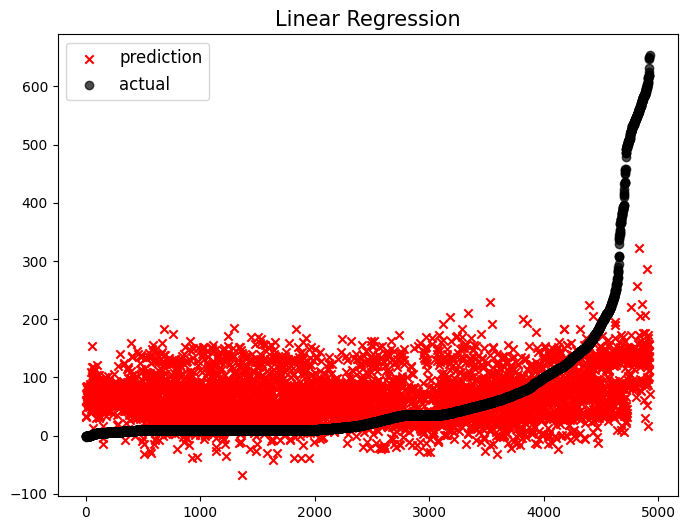

               model           mse
0  Linear Regression  12891.452285


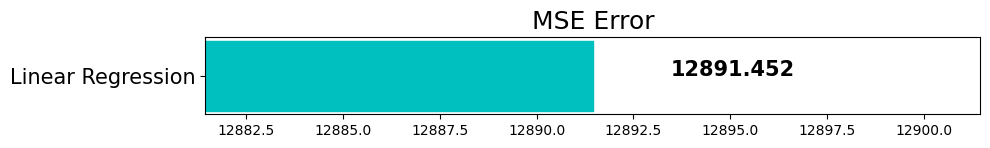

In [ ]:
mse_eval("Linear Regression", pred_lr, y_test)

### 2. Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
pred_dtr = dtr.predict(X_test)

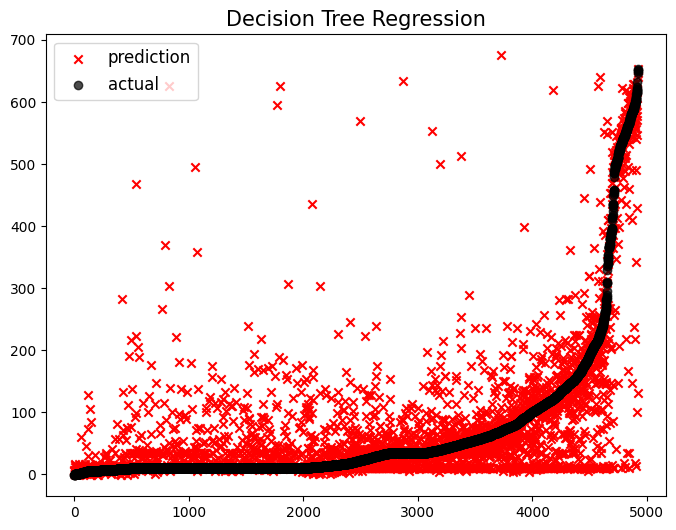

                      model           mse
0         Linear Regression  12891.452285
1  Decision Tree Regression   4056.304852


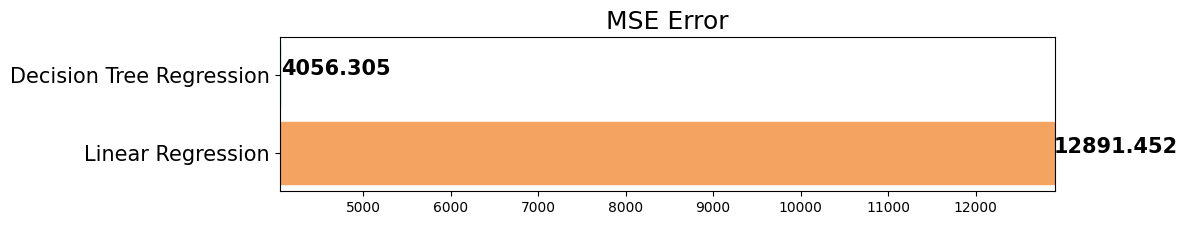

In [ ]:
mse_eval("Decision Tree Regression", pred_dtr, y_test)

### 3. Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = DecisionTreeRegressor()

rf.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
pred_rf = rf.predict(X_test)

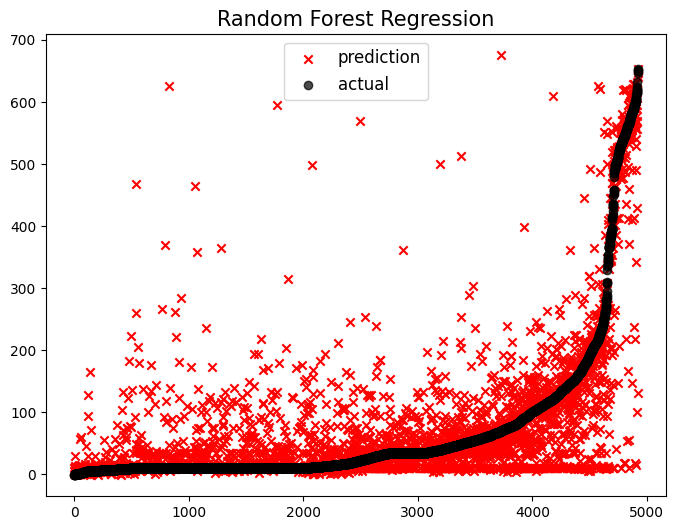

                      model           mse
0         Linear Regression  12891.452285
1  Decision Tree Regression   4056.304852
2  Random Forest Regression   3864.837272


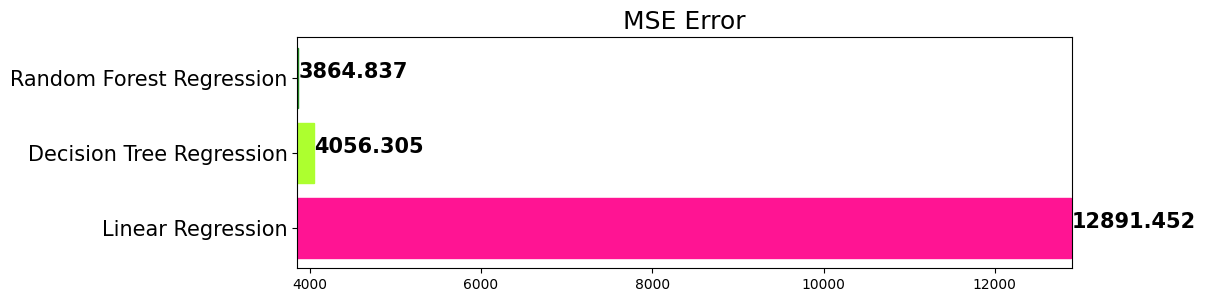

In [ ]:
mse_eval("Random Forest Regression", pred_rf, y_test)

### 4. Support Vector Machine

In [ ]:
from sklearn.svm import SVR

svr = SVR()

svr.fit(X_train, y_train)

SVR()

In [ ]:
pred_svr = svr.predict(X_test)

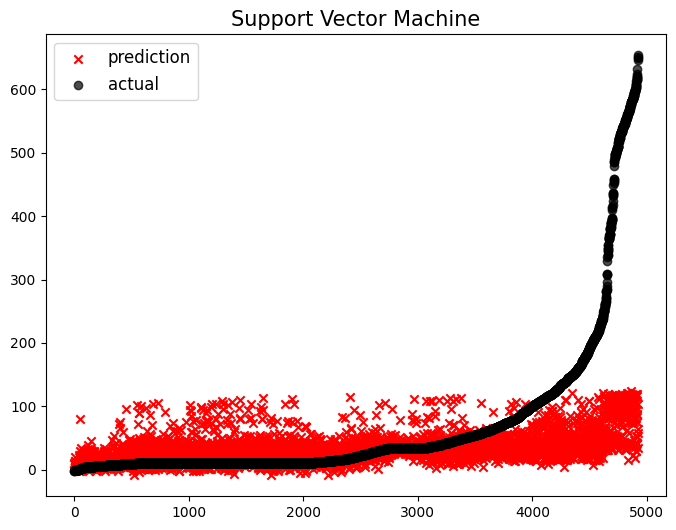

                      model           mse
0    Support Vector Machine  13162.181202
1         Linear Regression  12891.452285
2  Decision Tree Regression   4056.304852
3  Random Forest Regression   3864.837272


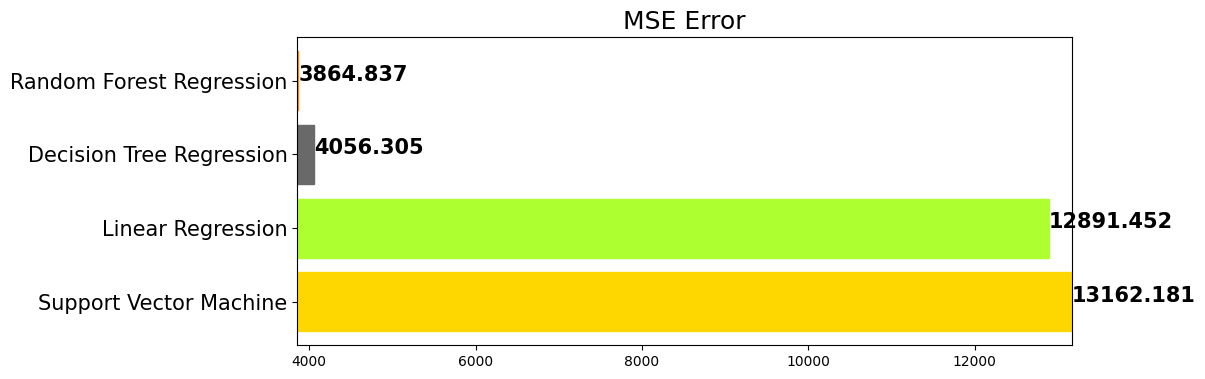

In [ ]:
mse_eval("Support Vector Machine", pred_svr, y_test)

### 5. lightGBM

In [ ]:
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor()

lgbm.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001424 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1720
[LightGBM] [Info] Number of data points in the train set: 19691, number of used features: 7
[LightGBM] [Info] Start training from score 69.268837


LGBMRegressor()

In [ ]:
pred_lgbm = lgbm.predict(X_test)

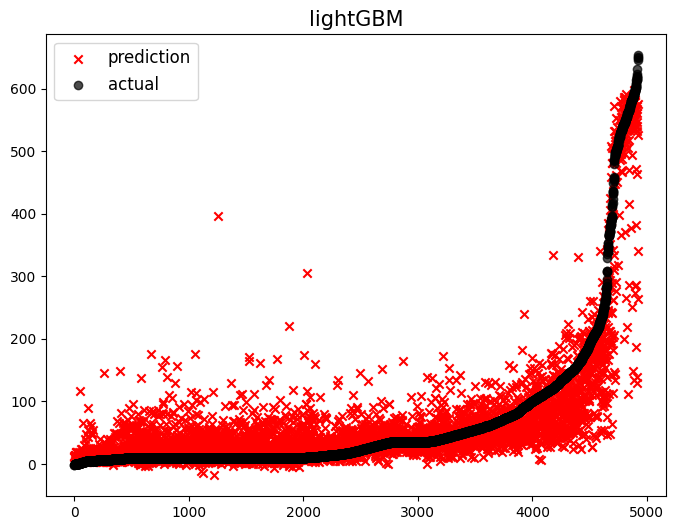

                      model           mse
0    Support Vector Machine  13162.181202
1         Linear Regression  12891.452285
2  Decision Tree Regression   4056.304852
3  Random Forest Regression   3864.837272
4                  lightGBM   2123.191249


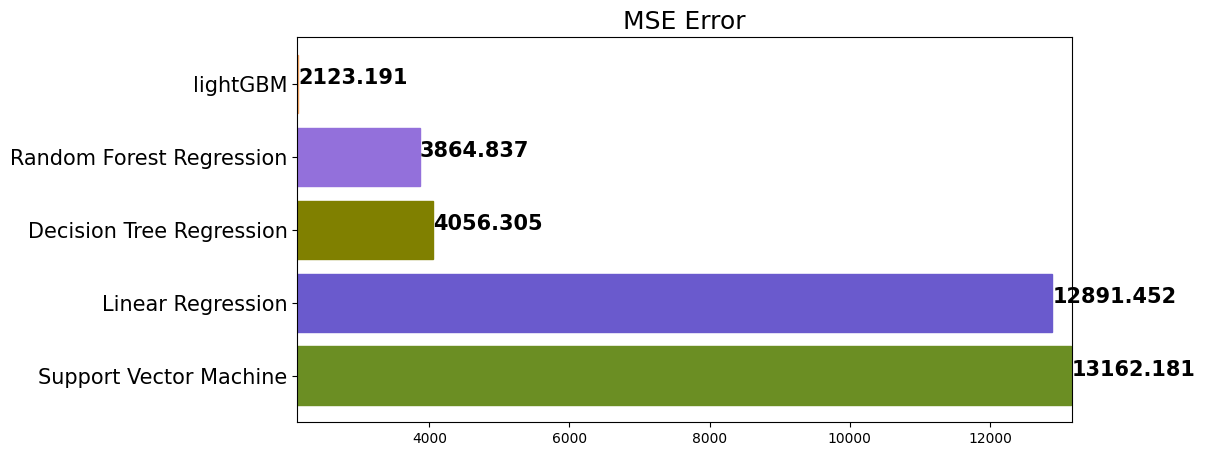

In [ ]:
mse_eval("lightGBM", pred_lgbm, y_test)

# 새 데이터로 예측하기

index | latitude | longitue | mag | nst | gap | dmin | magNst
:---: | :---: | :---: | :---: | :---: | :---: | :---: | :---:
1 | 52.0999 | 178.5218 | 3,10 | 14.0 | 139.0 | 0,8700 | 14.0
2 | 7.1397 | 126.7380 | 4.50 | 32.0 | 104.0 | 1.11520 | 43.0
3 | 19.1631 | -66.5251 | 3.93 | 23.0 | 246.0 | 0.8479 | 16.0
4 | -4.7803 | 102.7675 | 4.30 | 17.0 | 187.0 | 0.4570 | 5.0
5 | 53.3965 | -166.9417 | 3.00 | 19.0 | 190.0 | 0.4000 | 18.0


In [ ]:
sample_data = pd.DataFrame({'latitude': [52.0999, 7.1397, 19.1631, -4.7803, 53.3965],
        'longitude': [178.5218, 126.7380, -66.5251, 102.7675, -166.9417],
        'mag': [3.10, 4.50, 3.93, 4.30, 3.00],
        'nst': [14.0, 32.0, 23.0, 17.0, 19.0],
        'gap': [139.0, 104.0, 246.0, 187.0, 190.0],
        'dmin': [0.8700, 1.1520, 0.8479, 0.4570, 0.4000],
        'magNst': [14.0, 43.0, 16.0, 5.0, 18.0]})


scaled_sample = min_max_scaler.fit_transform(sample_data)

scaled_sample

array([[0.97771277, 1.        , 0.06666667, 0.        , 0.24647887,
        0.625     , 0.23684211],
       [0.20489267, 0.85010341, 1.        , 1.        , 0.        ,
        1.        , 1.        ],
       [0.41156268, 0.2906721 , 0.62      , 0.5       , 1.        ,
        0.5956117 , 0.28947368],
       [0.        , 0.78071692, 0.86666667, 0.16666667, 0.58450704,
        0.07579787, 0.        ],
       [1.        , 0.        , 0.        , 0.27777778, 0.6056338 ,
        0.        , 0.34210526]])

In [ ]:
pred_lr = lr.predict(scaled_sample)
pred_lr

array([-35.56464616, 251.43994202,  49.00074791, 112.77349719,
        64.64814807])

In [ ]:
pred_dtr = dtr.predict(scaled_sample)
pred_dtr

array([522.877, 650.655,  10.   ,  11.175,  73.695])

In [ ]:
pred_rf = rf.predict(scaled_sample)
pred_rf

array([533.896, 650.655,  10.   ,  10.   ,  93.4  ])

In [ ]:
pred_svr = svr.predict(scaled_sample)
pred_svr

array([39.96327621, 35.58988178, 20.51632634, -9.31018754, 23.82112327])

In [ ]:
pred_lgbm = lgbm.predict(scaled_sample)
pred_lgbm

array([316.40770532, 166.75278348,  20.09383161, -20.2494711 ,
        85.81654346])

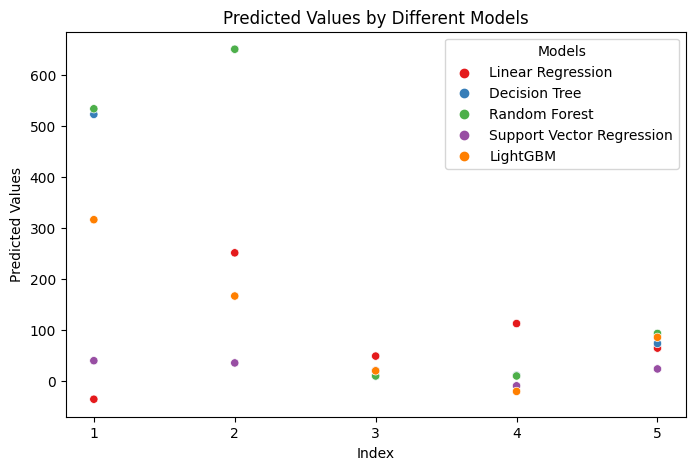

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 모델들의 예측값 저장
predictions = {
    'Linear Regression': pred_lr,
    'Decision Tree': pred_dtr,
    'Random Forest': pred_rf,
    'Support Vector Regression': pred_svr,
    'LightGBM': pred_lgbm
}

# 예측값을 데이터프레임으로 변환
predictions_df = pd.DataFrame(predictions, index=index_list)

# seaborn의 scatterplot을 사용하여 시각화
plt.figure(figsize=(8, 5))
sns.scatterplot(data=predictions_df, palette='Set1', markers=['o']*5)
plt.xlabel('Index')
plt.ylabel('Predicted Values')
plt.title('Predicted Values by Different Models')

# x 축의 눈금 조정
plt.xticks(index_list)

plt.legend(title='Models', loc='upper right')
plt.show()
